### NBA Hackathon 2019 Notebook - Submission 
### Team "ChampsMode" 
### Final MAPE: xxxxx%

Input dataset: 
Final dataset: 

### Summary
We analyzed and extracted features before running multiple models 

#### Main components positively influencing the Engagement numbers (most positive influencer first) 

Type of Post : Video<br>
Player Count : Number of player tags in the Description<br>
Day of Week : Sunday, Saturday, Monday, highest respectively<br>
Season type  : Regular season, as opposed to Offseason, playoffs, and finals (**)<br>
Timezone: Posts put out in peak EST timezone are found to generate more likes<br>

#### Main components negatively influencing the Engagement numbers (most negative influencer first) 

Negative correlation<br>
All Other tags : That denotes posts which have tags which do not contain one of the top 27 tags  <br>
Total Tags in post. : This means that the number of tags (if more than 2) do not positively inctrease the fanEngagement for that post<br>
Team count : The total count of each team in the dataset  <br>
Season is Offseason : Less fan engagement in the offseason compared to the other season times

-** The Higher number of likes generated during the regular season may be related to the numbers of US team followers who refuse to "like" the posts including the Toronto Raptors partiularly for the 2018-19 Plaoffs and NBA Finals 

### Module and library imports

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
from datetime import date, time
from datetime import datetime 
warnings.filterwarnings("ignore")
import pandas_profiling
import csv

### Check current directory contents  

In [132]:
!ls 

Alltags.csv              NBA_Handles.csv          dfhash_tags.csv
Codebase                 NbaHack_Final.ipynb      fml.ipynb
GetPlayerHandles.ipynb   NbaHack_Final.ipynb.copy holdout_set.csv
Merged.ipynb             NbaQA.ipynb              nbmerge.py
NBA.ipynb                Nbapred.ipynb            player_handles.csv
NBAQA.csv                Sorthashtags.ipynb       playernames.csv
NBATag_Categories.csv    Team_Slogans.csv         teamnames.csv
NBATeam_handles.csv      combined.csv             training_set.csv
NBATeam_tag.csv          combined.xlsx            tweet_activity.csv
NBATraing.csv            df_tags.csv              ~$combined.xlsx


### Read training and holdout set into dataframes  


In [133]:
#import data table
df = pd.read_csv("combined.csv",header=0,encoding = 'unicode_escape')
df.head(13)

,Eng,Followers,Created,Type,Description
0,1129585,26873604,2018-02-18 19:59:49 EST,Video,The captains meet for pregame #NBAAllStar talk...
1,1077014,30719053,2018-09-16 12:06:15 EDT,Video,30 days from #KiaTipOff18... we flashback to @...
2,1075434,30047470,2018-08-11 20:55:20 EDT,Video,At #1 on the TOP 60 DIMES... @kingjames! #NBAA...
3,1067990,26873604,2018-02-18 23:32:14 EST,Video,@kingjames (29p/10r/8a) hoists the 2018 #NBAAl...
4,1066099,30442523,2018-09-01 12:18:40 EDT,Video,Coming in at No.5...@kyrieirving SOMEHOW finds...
5,1059349,26873604,2018-02-18 22:20:39 EST,Video,@kingjames with the left! #NBAAllStar
6,1057987,31009808,2018-09-29 16:10:59 EDT,Video,17 days from #KiaTipOff18... @KingJames dished...
7,1055161,26706824,2018-02-08 21:03:45 EST,Video,???? @kyrieirving ????
8,1053787,31256836,2018-10-13 22:34:54 EDT,Video,"Entering season 16, the best of @kingjamesÃ­ #..."
9,1049127,31754126,2018-10-30 19:56:20 EDT,Video,?? @kyrieirving goes double behind-the-back! #...


#### Check import shape  
data includes training_set and holdout<br>

In [134]:
df.shape

(8766, 5)

#### check if there is any NaN values

In [135]:
# 
df.isna().sum()

Eng             0
Followers       0
Created         0
Type            0
Description    14
dtype: int64

In [136]:
#  Do the Pandas Profiling 
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,8766
Total Missing (%),0.0%
Total size in memory,342.5 KiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


#### Expand the 'Created' column into three columns (Date, time, TimeZone)

In [137]:
#
df[['Date','Time','TimeZone']] = df['Created'].str.split(' ',expand=True)
df

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone
0,1129585,26873604,2018-02-18 19:59:49 EST,Video,The captains meet for pregame #NBAAllStar talk...,2018-02-18,19:59:49,EST
1,1077014,30719053,2018-09-16 12:06:15 EDT,Video,30 days from #KiaTipOff18... we flashback to @...,2018-09-16,12:06:15,EDT
2,1075434,30047470,2018-08-11 20:55:20 EDT,Video,At #1 on the TOP 60 DIMES... @kingjames! #NBAA...,2018-08-11,20:55:20,EDT
3,1067990,26873604,2018-02-18 23:32:14 EST,Video,@kingjames (29p/10r/8a) hoists the 2018 #NBAAl...,2018-02-18,23:32:14,EST
4,1066099,30442523,2018-09-01 12:18:40 EDT,Video,Coming in at No.5...@kyrieirving SOMEHOW finds...,2018-09-01,12:18:40,EDT
5,1059349,26873604,2018-02-18 22:20:39 EST,Video,@kingjames with the left! #NBAAllStar,2018-02-18,22:20:39,EST
6,1057987,31009808,2018-09-29 16:10:59 EDT,Video,17 days from #KiaTipOff18... @KingJames dished...,2018-09-29,16:10:59,EDT
7,1055161,26706824,2018-02-08 21:03:45 EST,Video,???? @kyrieirving ????,2018-02-08,21:03:45,EST
8,1053787,31256836,2018-10-13 22:34:54 EDT,Video,"Entering season 16, the best of @kingjamesÃ­ #...",2018-10-13,22:34:54,EDT
9,1049127,31754126,2018-10-30 19:56:20 EDT,Video,?? @kyrieirving goes double behind-the-back! #...,2018-10-30,19:56:20,EDT


#### Setup  columns for year, month, day, weekday

In [138]:
df['Year'] = df.Created.apply(lambda x: pd.to_datetime(x).strftime('%Y'))
df['Month'] = df.Created.apply(lambda x: pd.to_datetime(x).strftime('%m'))
df['Day'] = df.Created.apply(lambda x: pd.to_datetime(x).strftime('%d'))
df['Weekday'] = df.Created.apply(lambda x: pd.to_datetime(x).strftime('%w'))
df['Weekofyear'] = df.Created.apply(lambda x: pd.to_datetime(x).strftime('%U'))

df['Hour'] = df.Created.apply(lambda x: pd.to_datetime(x).strftime('%H'))
df['Min'] = df.Created.apply(lambda x: pd.to_datetime(x).strftime('%M'))

df['Hr_min'] = df['Hour']+ df['Min']
df.head(40)

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone,Year,Month,Day,Weekday,Weekofyear,Hour,Min,Hr_min
0,1129585,26873604,2018-02-18 19:59:49 EST,Video,The captains meet for pregame #NBAAllStar talk...,2018-02-18,19:59:49,EST,2018,02,18,0,07,19,59,1959
1,1077014,30719053,2018-09-16 12:06:15 EDT,Video,30 days from #KiaTipOff18... we flashback to @...,2018-09-16,12:06:15,EDT,2018,09,16,0,37,12,06,1206
2,1075434,30047470,2018-08-11 20:55:20 EDT,Video,At #1 on the TOP 60 DIMES... @kingjames! #NBAA...,2018-08-11,20:55:20,EDT,2018,08,11,6,31,20,55,2055
3,1067990,26873604,2018-02-18 23:32:14 EST,Video,@kingjames (29p/10r/8a) hoists the 2018 #NBAAl...,2018-02-18,23:32:14,EST,2018,02,18,0,07,23,32,2332
4,1066099,30442523,2018-09-01 12:18:40 EDT,Video,Coming in at No.5...@kyrieirving SOMEHOW finds...,2018-09-01,12:18:40,EDT,2018,09,01,6,34,12,18,1218
5,1059349,26873604,2018-02-18 22:20:39 EST,Video,@kingjames with the left! #NBAAllStar,2018-02-18,22:20:39,EST,2018,02,18,0,07,22,20,2220
6,1057987,31009808,2018-09-29 16:10:59 EDT,Video,17 days from #KiaTipOff18... @KingJames dished...,2018-09-29,16:10:59,EDT,2018,09,29,6,38,16,10,1610
7,1055161,26706824,2018-02-08 21:03:45 EST,Video,???? @kyrieirving ????,2018-02-08,21:03:45,EST,2018,02,08,4,05,21,03,2103
8,1053787,31256836,2018-10-13 22:34:54 EDT,Video,"Entering season 16, the best of @kingjamesÃ­ #...",2018-10-13,22:34:54,EDT,2018,10,13,6,40,22,34,2234
9,1049127,31754126,2018-10-30 19:56:20 EDT,Video,?? @kyrieirving goes double behind-the-back! #...,2018-10-30,19:56:20,EDT,2018,10,30,2,43,19,56,1956


In [139]:
df.head(10)

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone,Year,Month,Day,Weekday,Weekofyear,Hour,Min,Hr_min
0,1129585,26873604,2018-02-18 19:59:49 EST,Video,The captains meet for pregame #NBAAllStar talk...,2018-02-18,19:59:49,EST,2018,02,18,0,07,19,59,1959
1,1077014,30719053,2018-09-16 12:06:15 EDT,Video,30 days from #KiaTipOff18... we flashback to @...,2018-09-16,12:06:15,EDT,2018,09,16,0,37,12,06,1206
2,1075434,30047470,2018-08-11 20:55:20 EDT,Video,At #1 on the TOP 60 DIMES... @kingjames! #NBAA...,2018-08-11,20:55:20,EDT,2018,08,11,6,31,20,55,2055
3,1067990,26873604,2018-02-18 23:32:14 EST,Video,@kingjames (29p/10r/8a) hoists the 2018 #NBAAl...,2018-02-18,23:32:14,EST,2018,02,18,0,07,23,32,2332
4,1066099,30442523,2018-09-01 12:18:40 EDT,Video,Coming in at No.5...@kyrieirving SOMEHOW finds...,2018-09-01,12:18:40,EDT,2018,09,01,6,34,12,18,1218
5,1059349,26873604,2018-02-18 22:20:39 EST,Video,@kingjames with the left! #NBAAllStar,2018-02-18,22:20:39,EST,2018,02,18,0,07,22,20,2220
6,1057987,31009808,2018-09-29 16:10:59 EDT,Video,17 days from #KiaTipOff18... @KingJames dished...,2018-09-29,16:10:59,EDT,2018,09,29,6,38,16,10,1610
7,1055161,26706824,2018-02-08 21:03:45 EST,Video,???? @kyrieirving ????,2018-02-08,21:03:45,EST,2018,02,08,4,05,21,03,2103
8,1053787,31256836,2018-10-13 22:34:54 EDT,Video,"Entering season 16, the best of @kingjamesÃ­ #...",2018-10-13,22:34:54,EDT,2018,10,13,6,40,22,34,2234
9,1049127,31754126,2018-10-30 19:56:20 EDT,Video,?? @kyrieirving goes double behind-the-back! #...,2018-10-30,19:56:20,EDT,2018,10,30,2,43,19,56,1956


#### Create dataframes with all the tags and hashtags in the Disc Column
Lower case the complete dataframe to avoid tag spelling case errors 

In [146]:
#
df = df.apply(lambda x: x.astype(str).str.lower())

In [147]:
import re

# #gets the # of '@'
# text = "@kyle_lowry7 pulls from deep for the @raptors"  
# result = re.findall(r"\@+", text)  
# print(result)

# #gets the  handels of '@'
# text = "@kyle_lowry7 pulls from deep for the @raptors"  
# result = re.findall("[@]\w+", text)
# print(result)

### Create single column of Description to extract hashtags and tags 

In [148]:
Disc = df['Description']
Disc

0       the captains meet for pregame #nbaallstar talk...
1       30 days from #kiatipoff18... we flashback to @...
2       at #1 on the top 60 dimes... @kingjames! #nbaa...
3       @kingjames (29p/10r/8a) hoists the 2018 #nbaal...
4       coming in at no.5...@kyrieirving somehow finds...
5                   @kingjames with the left! #nbaallstar
6       17 days from #kiatipoff18... @kingjames dished...
7                                  ???? @kyrieirving ????
8       entering season 16, the best of @kingjamesã­ #...
9       ?? @kyrieirving goes double behind-the-back! #...
10      @kingjames uses the window to himself! #kiatip...
11      @kingjames droppinã­ dimes and triples early f...
12                       ?? how did @kingjames do that?!?
13                  @kingjames takes flight! #posteralert
14                                      @kingjames ??????
15      @kingjames finishes with 29 points, 10 rebound...
16      @kingjames signs off from the 2018 #nbaallstar...
17      @kingj

### Extract tags 

In [149]:
tag_counts = []
for i in Disc:
    text = i
    tags = re.findall(r"\@+", str(text))
    tag_counts.append(len(tags))
    #  print(tags)

### Extract hashtags 

In [150]:
name_tags = []
for i in Disc:
    text = i
    nametags = re.findall("[@]\w+", str(text))
    name_tags.append(nametags)
#     print(nametags)

### Convert list of tags to dataframe format

In [151]:
nametags = pd.DataFrame(name_tags)
nametags

,0,1,2,3,4,5,6,7,8,9
0,@kingjames,@stephencurry30,None,None,None,None,None,None,None,None
1,@kingjames,None,None,None,None,None,None,None,None,None
2,@kingjames,None,None,None,None,None,None,None,None,None
3,@kingjames,None,None,None,None,None,None,None,None,None
4,@kyrieirving,None,None,None,None,None,None,None,None,None
5,@kingjames,None,None,None,None,None,None,None,None,None
6,@kingjames,None,None,None,None,None,None,None,None,None
7,@kyrieirving,None,None,None,None,None,None,None,None,None
8,@kingjamesã,None,None,None,None,None,None,None,None,None
9,@kyrieirving,None,None,None,None,None,None,None,None,None


### Extract hashtags

In [152]:
hashtag_counts = []
for i in Disc:
    text = i
    tags = re.findall("#",str(text))
    tag_counts.append(len(tags))
#   print(tags)

In [153]:
name_hashtags = []
for i in Disc:
    text = i
    namehashtags = re.findall("[#]\w+", str(text))
    name_hashtags.append(namehashtags)

In [154]:
namehashtags = pd.DataFrame(name_hashtags)
namehashtags

,0,1,2,3,4
0,#nbaallstar,None,None,None,None
1,#kiatipoff18,None,None,None,None
2,#1,#nbaassistweek,None,None,None
3,#nbaallstar,#kiaallstarmvp,None,None,None
4,#bestofnba,None,None,None,None
5,#nbaallstar,None,None,None,None
6,#kiatipoff18,None,None,None,None
7,None,None,None,None,None
8,#nbapreseason,#thisiswhyweplay,None,None,None
9,#kiatipoff18,None,None,None,None


### Extract  list of tags to CSV

In [155]:
#Export data to see clean
dfhash_tags = pd.DataFrame(name_hashtags) 
dfhash_tags.to_csv('dfhash_tags.csv', header=True, index=False)


In [156]:
df_tags = pd.DataFrame(name_tags)
df_tags.to_csv('df_tags.csv', header=True, index=False)

### Evaluate and count Unique Tags

In [157]:
unique_tags = df_tags.apply(pd.value_counts).sum(axis = 1).sort_values(ascending=False)

unique_tags = pd.DataFrame(
    {'tags':unique_tags.index,
     'count':unique_tags.values
    })
print(unique_tags['count'].count())
print(unique_tags['count'].sum())

937
13210.0


In [158]:
unique_tags_per = unique_tags['count'] > 49
unique_tags_per= unique_tags[unique_tags_per]
print(unique_tags_per['count'].count())
print(unique_tags_per['count'].sum())

62
9042.0


### check the all other hashtags 


In [159]:
#
unique_AllOther_tags_per = unique_tags['count'] <= 49
unique_AllOther_tags_per= unique_tags[unique_AllOther_tags_per]
print(unique_AllOther_tags_per['count'].count())
print(unique_AllOther_tags_per['count'].sum())

875
4168.0


### percentage of unique tags 


In [160]:
unique_tags_per['count'].sum()/unique_tags['count'].sum()

0.6844814534443603

### Plot the tags numbers  

[]

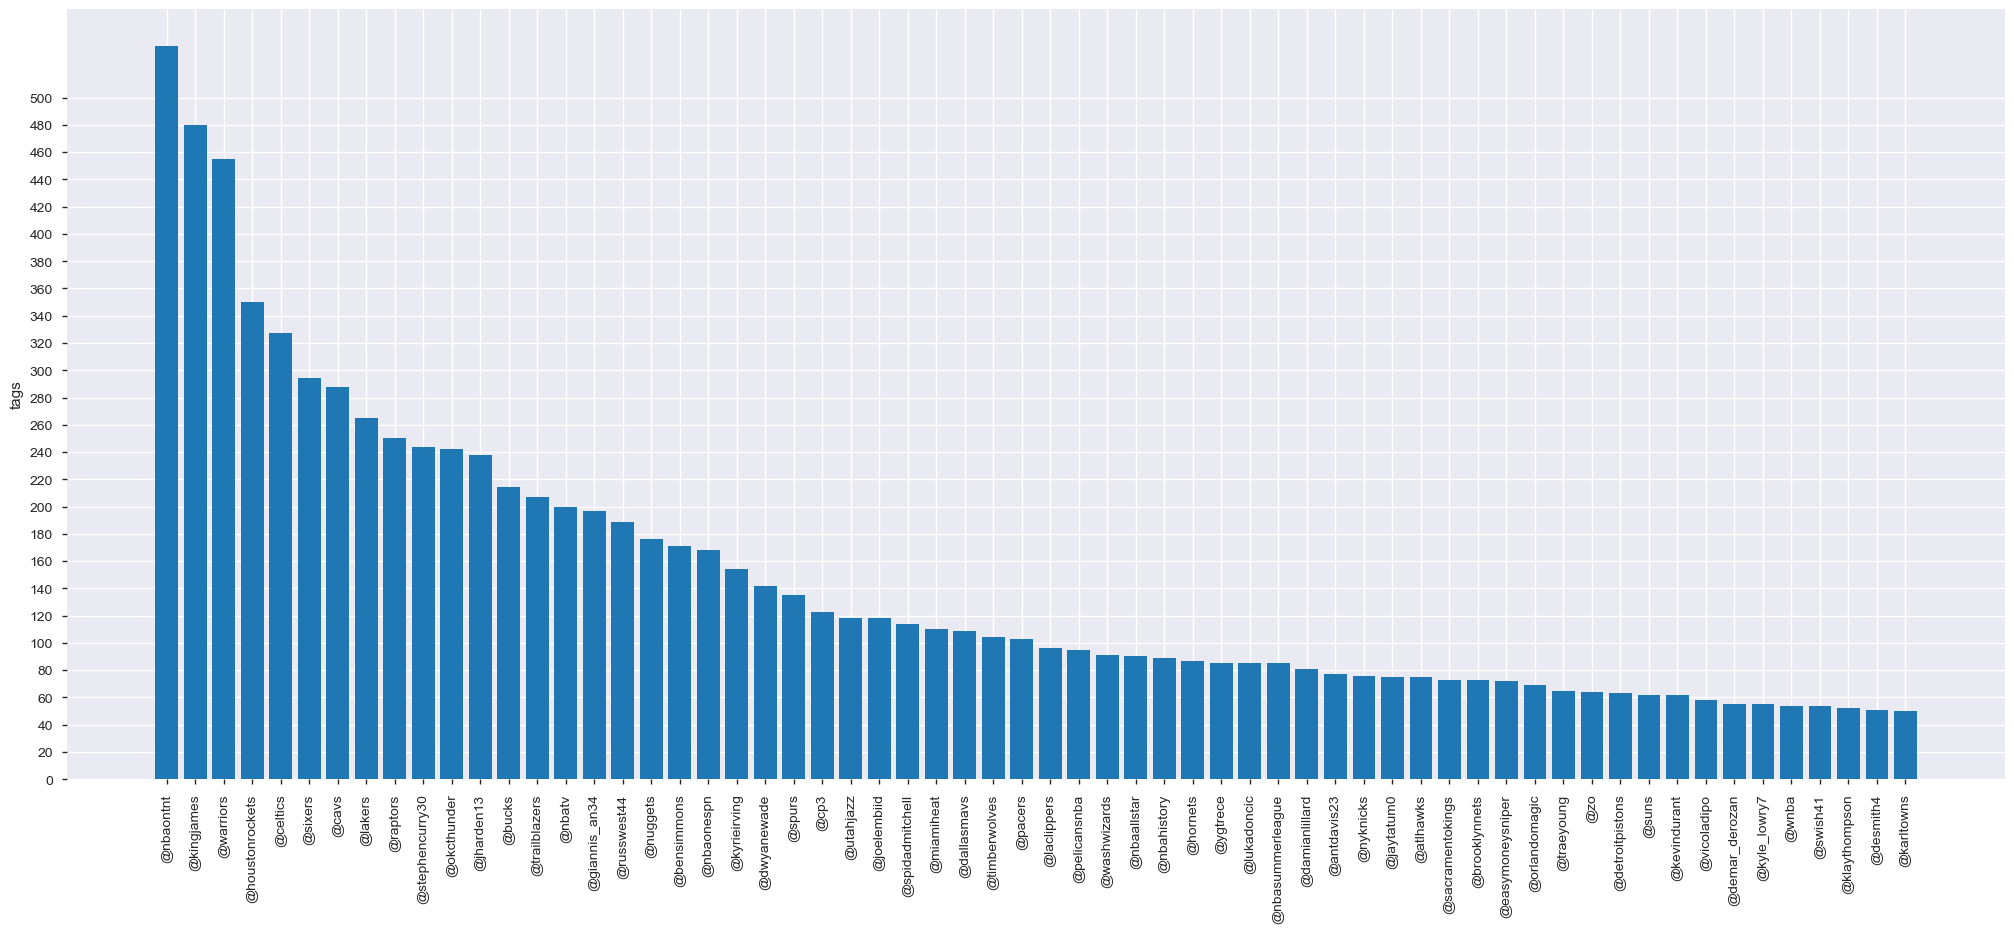

In [161]:
## plot the results
plt.figure(figsize=(25,10))
plt.bar(unique_tags_per['tags'], unique_tags_per['count'])
plt.ylabel('tags')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 520, step=20))
plt.plot()

### Create columns that showcases top tags

In [162]:
# create a list for top tags
top_tags = unique_tags_per['tags'].values
top_tags

array(['@nbaontnt', '@kingjames', '@warriors', '@houstonrockets',
       '@celtics', '@sixers', '@cavs', '@lakers', '@raptors',
       '@stephencurry30', '@okcthunder', '@jharden13', '@bucks',
       '@trailblazers', '@nbatv', '@giannis_an34', '@russwest44',
       '@nuggets', '@bensimmons', '@nbaonespn', '@kyrieirving',
       '@dwyanewade', '@spurs', '@cp3', '@utahjazz', '@joelembiid',
       '@spidadmitchell', '@miamiheat', '@dallasmavs', '@timberwolves',
       '@pacers', '@laclippers', '@pelicansnba', '@washwizards',
       '@nbaallstar', '@nbahistory', '@hornets', '@ygtrece',
       '@lukadoncic', '@nbasummerleague', '@damianlillard', '@antdavis23',
       '@nyknicks', '@jaytatum0', '@atlhawks', '@sacramentokings',
       '@brooklynnets', '@easymoneysniper', '@orlandomagic', '@traeyoung',
       '@zo', '@detroitpistons', '@suns', '@kevindurant', '@vicoladipo',
       '@demar_derozan', '@kyle_lowry7', '@wnba', '@swish41',
       '@klaythompson', '@desmith4', '@karltowns'], dtype=o

### Set up top tags counter and evaluate with loop


In [163]:
# create the hashtags_count column for tophashtags
df['toptag_count'] = 0

In [164]:
for hashtag in top_tags:
    df['toptag_count'] += df['Description'].str.contains(hashtag)

### Add toptags column and content to dataframe 


In [165]:
df['contains_toptag'] = df['toptag_count'] > 0
df.head(20)

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone,Year,Month,Day,Weekday,Weekofyear,Hour,Min,Hr_min,toptag_count,contains_toptag
0,1129585,26873604,2018-02-18 19:59:49 est,video,the captains meet for pregame #nbaallstar talk...,2018-02-18,19:59:49,est,2018,02,18,0,07,19,59,1959,2,True
1,1077014,30719053,2018-09-16 12:06:15 edt,video,30 days from #kiatipoff18... we flashback to @...,2018-09-16,12:06:15,edt,2018,09,16,0,37,12,06,1206,1,True
2,1075434,30047470,2018-08-11 20:55:20 edt,video,at #1 on the top 60 dimes... @kingjames! #nbaa...,2018-08-11,20:55:20,edt,2018,08,11,6,31,20,55,2055,1,True
3,1067990,26873604,2018-02-18 23:32:14 est,video,@kingjames (29p/10r/8a) hoists the 2018 #nbaal...,2018-02-18,23:32:14,est,2018,02,18,0,07,23,32,2332,1,True
4,1066099,30442523,2018-09-01 12:18:40 edt,video,coming in at no.5...@kyrieirving somehow finds...,2018-09-01,12:18:40,edt,2018,09,01,6,34,12,18,1218,1,True
5,1059349,26873604,2018-02-18 22:20:39 est,video,@kingjames with the left! #nbaallstar,2018-02-18,22:20:39,est,2018,02,18,0,07,22,20,2220,1,True
6,1057987,31009808,2018-09-29 16:10:59 edt,video,17 days from #kiatipoff18... @kingjames dished...,2018-09-29,16:10:59,edt,2018,09,29,6,38,16,10,1610,1,True
7,1055161,26706824,2018-02-08 21:03:45 est,video,???? @kyrieirving ????,2018-02-08,21:03:45,est,2018,02,08,4,05,21,03,2103,1,True
8,1053787,31256836,2018-10-13 22:34:54 edt,video,"entering season 16, the best of @kingjamesã­ #...",2018-10-13,22:34:54,edt,2018,10,13,6,40,22,34,2234,1,True
9,1049127,31754126,2018-10-30 19:56:20 edt,video,?? @kyrieirving goes double behind-the-back! #...,2018-10-30,19:56:20,edt,2018,10,30,2,43,19,56,1956,1,True


# Create columns that showcases Allother tags

In [166]:
#create a list for all other tags
Allother_tags = unique_AllOther_tags_per['tags'].values
# Allother_tags

### Evaluate and Add all other top tags column and content to dataframe 
All other are anything which are not the top tags


In [167]:
# create the tags count column for toptags
df['allothertag_count'] = 0

In [168]:
for hashtag in Allother_tags:
    df['allothertag_count'] += df['Description'].str.contains(hashtag)

### Create column for all other tags (not top tags)

In [169]:
df['contains_allothertag'] = df['allothertag_count'] > 0
df.head(20)

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone,Year,Month,Day,Weekday,Weekofyear,Hour,Min,Hr_min,toptag_count,contains_toptag,allothertag_count,contains_allothertag
0,1129585,26873604,2018-02-18 19:59:49 est,video,the captains meet for pregame #nbaallstar talk...,2018-02-18,19:59:49,est,2018,02,18,0,07,19,59,1959,2,True,1,True
1,1077014,30719053,2018-09-16 12:06:15 edt,video,30 days from #kiatipoff18... we flashback to @...,2018-09-16,12:06:15,edt,2018,09,16,0,37,12,06,1206,1,True,0,False
2,1075434,30047470,2018-08-11 20:55:20 edt,video,at #1 on the top 60 dimes... @kingjames! #nbaa...,2018-08-11,20:55:20,edt,2018,08,11,6,31,20,55,2055,1,True,0,False
3,1067990,26873604,2018-02-18 23:32:14 est,video,@kingjames (29p/10r/8a) hoists the 2018 #nbaal...,2018-02-18,23:32:14,est,2018,02,18,0,07,23,32,2332,1,True,0,False
4,1066099,30442523,2018-09-01 12:18:40 edt,video,coming in at no.5...@kyrieirving somehow finds...,2018-09-01,12:18:40,edt,2018,09,01,6,34,12,18,1218,1,True,0,False
5,1059349,26873604,2018-02-18 22:20:39 est,video,@kingjames with the left! #nbaallstar,2018-02-18,22:20:39,est,2018,02,18,0,07,22,20,2220,1,True,0,False
6,1057987,31009808,2018-09-29 16:10:59 edt,video,17 days from #kiatipoff18... @kingjames dished...,2018-09-29,16:10:59,edt,2018,09,29,6,38,16,10,1610,1,True,0,False
7,1055161,26706824,2018-02-08 21:03:45 est,video,???? @kyrieirving ????,2018-02-08,21:03:45,est,2018,02,08,4,05,21,03,2103,1,True,0,False
8,1053787,31256836,2018-10-13 22:34:54 edt,video,"entering season 16, the best of @kingjamesã­ #...",2018-10-13,22:34:54,edt,2018,10,13,6,40,22,34,2234,1,True,1,True
9,1049127,31754126,2018-10-30 19:56:20 edt,video,?? @kyrieirving goes double behind-the-back! #...,2018-10-30,19:56:20,edt,2018,10,30,2,43,19,56,1956,1,True,0,False


# Unique hashtags

In [170]:
unique_hashtags = dfhash_tags.apply(pd.value_counts).sum(axis = 1).sort_values(ascending=False)

unique_hashtags = pd.DataFrame(
    {'tags':unique_hashtags.index,
     'count':unique_hashtags.values
    })
print(unique_hashtags['count'].count())
print(unique_hashtags['count'].sum())

373
5266.0


### List of unique hashtags

In [171]:
unique_hashtags

,tags,count
0,#nbaplayoffs,662.0
1,#thisiswhyweplay,501.0
2,#nbaonabc,294.0
3,#nbapreseason,226.0
4,#kiatipoff18,204.0
5,#nbafinals,176.0
6,#nbabreakdown,175.0
7,#nbaallstar,153.0
8,#tripledoublealert,130.0
9,#phantomcam,127.0


### List of unique hashtags

In [172]:
#check the top hashtags 
unique_hashtags_per = unique_hashtags['count'] > 29
unique_hashtags_per= unique_hashtags[unique_hashtags_per]
print(unique_hashtags_per['count'].count())
print(unique_hashtags_per['count'].sum())

26
3674.0


### List of all other hashtags

In [173]:
#check the all other hashtags 
unique_AllOther_hashtags_per = unique_hashtags['count'] <= 29
unique_AllOther_hashtags_per= unique_hashtags[unique_AllOther_hashtags_per]
print(unique_AllOther_hashtags_per['count'].count())
print(unique_AllOther_hashtags_per['count'].sum())

347
1592.0


### Ratio of unique hashtags

In [174]:
unique_hashtags_per['count'].sum()/unique_hashtags['count'].sum()

0.697683251044436

### Plot the unique hashtags

[]

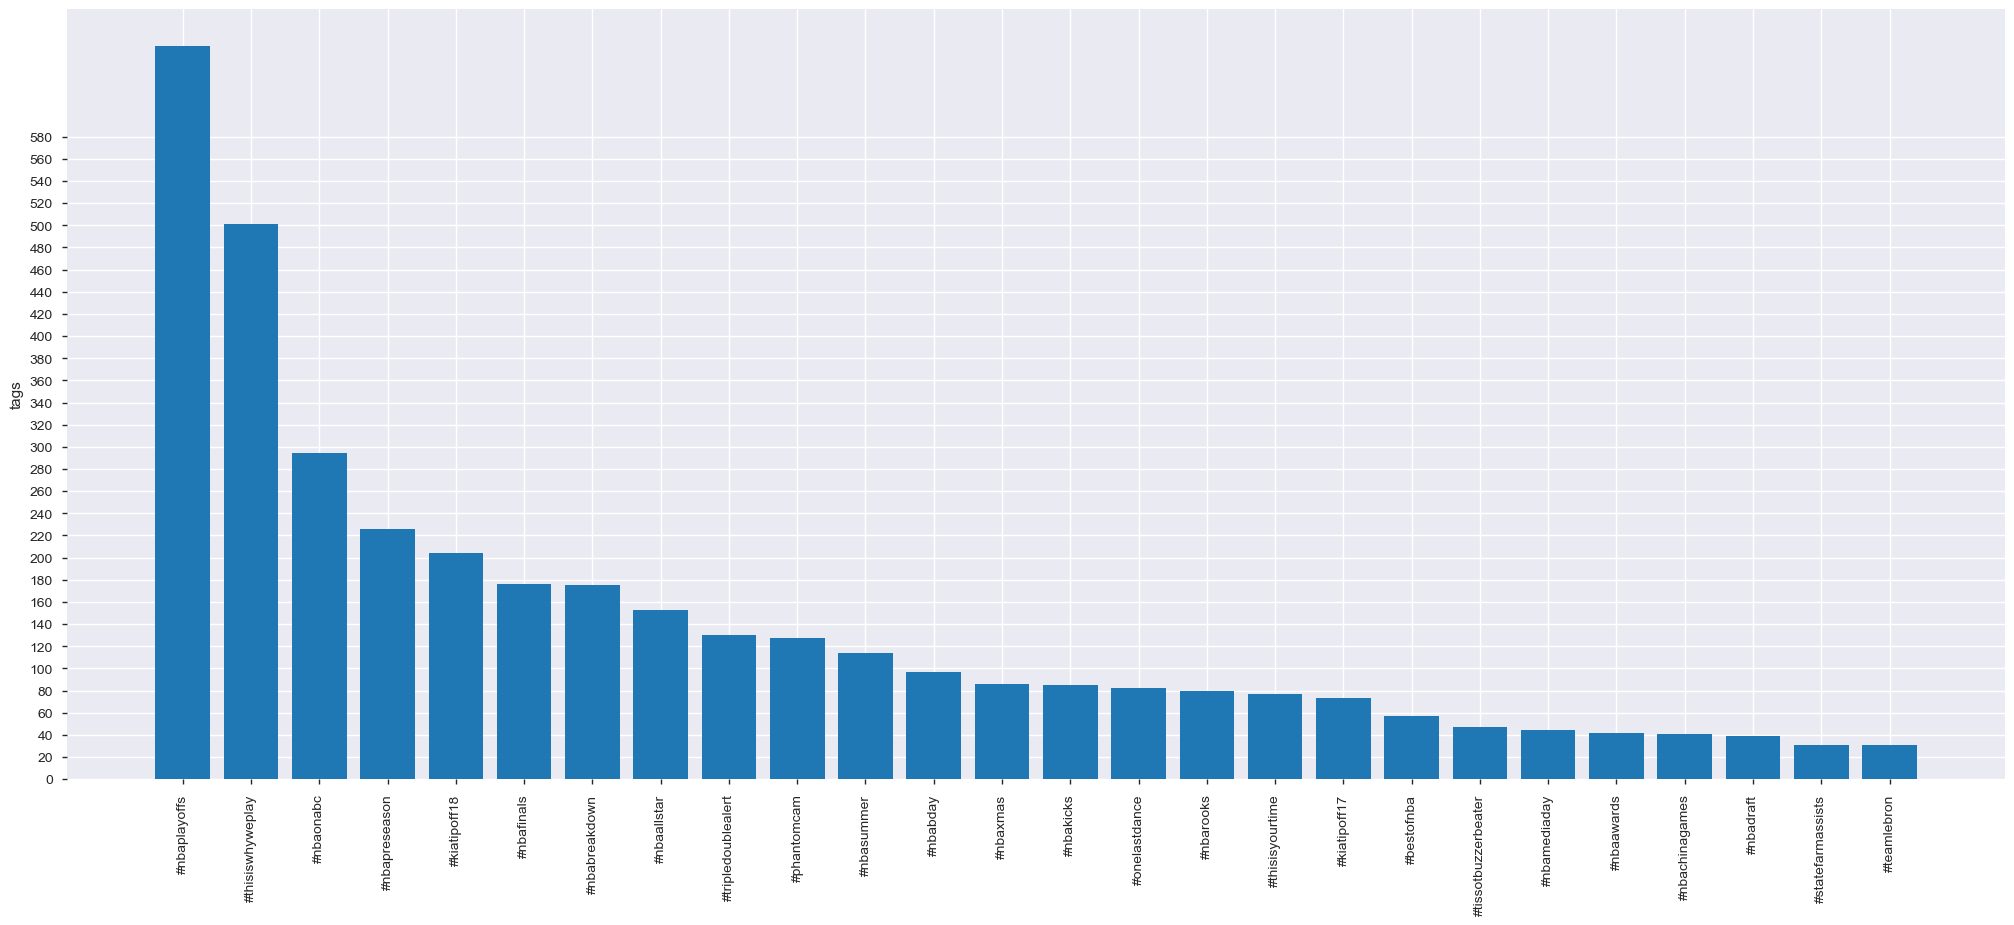

In [175]:
## plot the results
plt.figure(figsize=(25,10))
plt.bar(unique_hashtags_per['tags'], unique_hashtags_per['count'])
plt.ylabel('tags')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 600, step=20))
plt.plot()

# Create columns that showcases top Hash tags

In [176]:
#create a list for top hashtags
top_hashtags = unique_hashtags_per['tags'].values
top_hashtags

array(['#nbaplayoffs', '#thisiswhyweplay', '#nbaonabc', '#nbapreseason',
       '#kiatipoff18', '#nbafinals', '#nbabreakdown', '#nbaallstar',
       '#tripledoublealert', '#phantomcam', '#nbasummer', '#nbabday',
       '#nbaxmas', '#nbakicks', '#onelastdance', '#nbarooks',
       '#thisisyourtime', '#kiatipoff17', '#bestofnba',
       '#tissotbuzzerbeater', '#nbamediaday', '#nbaawards',
       '#nbachinagames', '#nbadraft', '#statefarmassists', '#teamlebron'],
      dtype=object)

In [177]:
# create the hashtags_count column for tophashtags
df['tophashtag_count'] = 0

In [178]:
for hashtag in top_hashtags:
    df['tophashtag_count'] += df['Description'].str.contains(hashtag)

In [179]:
df['contains_tophashtag'] = df['tophashtag_count'] > 0

# Create columns that showcases All Other Hash tags

In [180]:
# create a list for all other hashtags
AllOther_hashtags = unique_AllOther_hashtags_per['tags'].values
AllOther_hashtags

array(['#kickstartrisingstars', '#mtndewicerisingstars',
       '#assistsoftheweek', '#watchmework', '#kiawhoyagot',
       '#nbadunkweek', '#nikexnba', '#18hoopclass', '#nbalondon',
       '#dubnation', '#sweepstakes', '#verizondunk', '#kiarotm',
       '#kiapotm', '#jrnbaworldchampionship', '#usabmnt',
       '#rufflescelebgame', '#nbahandlesweek', '#ko8e24',
       '#whateverittakes', '#statefarmsaturday', '#posteralert',
       '#lakeshow', '#nbaafricagame', '#wnbaplayoffs', '#attslamdunk',
       '#kumhohandles', '#wnbafinals', '#kiamvp', '#globalgame',
       '#hoopsfortroops', '#nbacelebrow', '#nbagamechangers', '#mlkday',
       '#thunderup', '#legendarymoments', '#nbaassistweek', '#nbasoundup',
       '#tacobellskills', '#nbavoices', '#nbavault', '#allforone',
       '#nbastyle', '#graciasmanu', '#gleaguefinals', '#wethenorth',
       '#rockets', '#mtndew3pt', '#teamstephen', '#teamgiannis',
       '#nbablockweek', '#nbacombine', '#insidestuff', '#kobe40',
       '#cavsallacce

In [181]:
# create the hashtags_count column for Allotherhashtags
df['allotherhashtag_count'] = 0

In [182]:
for hashtag in top_hashtags:
    df['allotherhashtag_count'] += df['Description'].str.contains(hashtag)

In [183]:
df['contains_allotherhashtag'] = df['allotherhashtag_count'] > 0
df.head(20)

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone,Year,Month,...,Min,Hr_min,toptag_count,contains_toptag,allothertag_count,contains_allothertag,tophashtag_count,contains_tophashtag,allotherhashtag_count,contains_allotherhashtag
0,1129585,26873604,2018-02-18 19:59:49 est,video,the captains meet for pregame #nbaallstar talk...,2018-02-18,19:59:49,est,2018,02,...,59,1959,2,True,1,True,1,True,1,True
1,1077014,30719053,2018-09-16 12:06:15 edt,video,30 days from #kiatipoff18... we flashback to @...,2018-09-16,12:06:15,edt,2018,09,...,06,1206,1,True,0,False,1,True,1,True
2,1075434,30047470,2018-08-11 20:55:20 edt,video,at #1 on the top 60 dimes... @kingjames! #nbaa...,2018-08-11,20:55:20,edt,2018,08,...,55,2055,1,True,0,False,0,False,0,False
3,1067990,26873604,2018-02-18 23:32:14 est,video,@kingjames (29p/10r/8a) hoists the 2018 #nbaal...,2018-02-18,23:32:14,est,2018,02,...,32,2332,1,True,0,False,1,True,1,True
4,1066099,30442523,2018-09-01 12:18:40 edt,video,coming in at no.5...@kyrieirving somehow finds...,2018-09-01,12:18:40,edt,2018,09,...,18,1218,1,True,0,False,1,True,1,True
5,1059349,26873604,2018-02-18 22:20:39 est,video,@kingjames with the left! #nbaallstar,2018-02-18,22:20:39,est,2018,02,...,20,2220,1,True,0,False,1,True,1,True
6,1057987,31009808,2018-09-29 16:10:59 edt,video,17 days from #kiatipoff18... @kingjames dished...,2018-09-29,16:10:59,edt,2018,09,...,10,1610,1,True,0,False,1,True,1,True
7,1055161,26706824,2018-02-08 21:03:45 est,video,???? @kyrieirving ????,2018-02-08,21:03:45,est,2018,02,...,03,2103,1,True,0,False,0,False,0,False
8,1053787,31256836,2018-10-13 22:34:54 edt,video,"entering season 16, the best of @kingjamesã­ #...",2018-10-13,22:34:54,edt,2018,10,...,34,2234,1,True,1,True,2,True,2,True
9,1049127,31754126,2018-10-30 19:56:20 edt,video,?? @kyrieirving goes double behind-the-back! #...,2018-10-30,19:56:20,edt,2018,10,...,56,1956,1,True,0,False,1,True,1,True


###

In [184]:
df['Total_tag'] = df['toptag_count']+df['allothertag_count']
df['Total_hashtag'] = df['tophashtag_count']+df['allotherhashtag_count']
df.head()

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone,Year,Month,...,toptag_count,contains_toptag,allothertag_count,contains_allothertag,tophashtag_count,contains_tophashtag,allotherhashtag_count,contains_allotherhashtag,Total_tag,Total_hashtag
0,1129585,26873604,2018-02-18 19:59:49 est,video,the captains meet for pregame #nbaallstar talk...,2018-02-18,19:59:49,est,2018,02,...,2,True,1,True,1,True,1,True,3,2
1,1077014,30719053,2018-09-16 12:06:15 edt,video,30 days from #kiatipoff18... we flashback to @...,2018-09-16,12:06:15,edt,2018,09,...,1,True,0,False,1,True,1,True,1,2
2,1075434,30047470,2018-08-11 20:55:20 edt,video,at #1 on the top 60 dimes... @kingjames! #nbaa...,2018-08-11,20:55:20,edt,2018,08,...,1,True,0,False,0,False,0,False,1,0
3,1067990,26873604,2018-02-18 23:32:14 est,video,@kingjames (29p/10r/8a) hoists the 2018 #nbaal...,2018-02-18,23:32:14,est,2018,02,...,1,True,0,False,1,True,1,True,1,2
4,1066099,30442523,2018-09-01 12:18:40 edt,video,coming in at no.5...@kyrieirving somehow finds...,2018-09-01,12:18:40,edt,2018,09,...,1,True,0,False,1,True,1,True,1,2


In [185]:
df.isna().sum()

Eng                         0
Followers                   0
Created                     0
Type                        0
Description                 0
Date                        0
Time                        0
TimeZone                    0
Year                        0
Month                       0
Day                         0
Weekday                     0
Weekofyear                  0
Hour                        0
Min                         0
Hr_min                      0
toptag_count                0
contains_toptag             0
allothertag_count           0
contains_allothertag        0
tophashtag_count            0
contains_tophashtag         0
allotherhashtag_count       0
contains_allotherhashtag    0
Total_tag                   0
Total_hashtag               0
dtype: int64

## Feature Selection

In [186]:
#import data table
df3 = pd.read_csv("NBAQA.csv",header=0,encoding = 'unicode_escape')
df3.head(13)

,Season,player_count,team_count
0,Playoffs,3,1
1,Playoffs,0,1
2,Playoffs,0,1
3,Playoffs,0,0
4,Playoffs,1,0
5,Playoffs,0,0
6,Playoffs,0,1
7,Playoffs,0,2
8,Playoffs,0,1
9,Playoffs,1,0


In [187]:
df = df.join(df3)

In [188]:
df.shape

(8766, 29)

In [189]:
df.head(5)

,Eng,Followers,Created,Type,Description,Date,Time,TimeZone,Year,Month,...,contains_allothertag,tophashtag_count,contains_tophashtag,allotherhashtag_count,contains_allotherhashtag,Total_tag,Total_hashtag,Season,player_count,team_count
0,1129585,26873604,2018-02-18 19:59:49 est,video,the captains meet for pregame #nbaallstar talk...,2018-02-18,19:59:49,est,2018,02,...,True,1,True,1,True,3,2,Playoffs,3,1
1,1077014,30719053,2018-09-16 12:06:15 edt,video,30 days from #kiatipoff18... we flashback to @...,2018-09-16,12:06:15,edt,2018,09,...,False,1,True,1,True,1,2,Playoffs,0,1
2,1075434,30047470,2018-08-11 20:55:20 edt,video,at #1 on the top 60 dimes... @kingjames! #nbaa...,2018-08-11,20:55:20,edt,2018,08,...,False,0,False,0,False,1,0,Playoffs,0,1
3,1067990,26873604,2018-02-18 23:32:14 est,video,@kingjames (29p/10r/8a) hoists the 2018 #nbaal...,2018-02-18,23:32:14,est,2018,02,...,False,1,True,1,True,1,2,Playoffs,0,0
4,1066099,30442523,2018-09-01 12:18:40 edt,video,coming in at no.5...@kyrieirving somehow finds...,2018-09-01,12:18:40,edt,2018,09,...,False,1,True,1,True,1,2,Playoffs,1,0


In [190]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Mape function

In [191]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.mean(np.abs((y_true - y_pred) / y_true)) * 100)

In [192]:
# split the data into:
# training_set
df1 = df.iloc[:7766,:]
#holdout_set
df2 = df.iloc[-1000:,:]

# Feature Selection , Build the model, check score, and results 

In [193]:
df_final = df1

In [194]:
df_final.columns

Index(['Eng', 'Followers', 'Created', 'Type', 'Description', 'Date', 'Time',
       'TimeZone', 'Year', 'Month', 'Day', 'Weekday', 'Weekofyear', 'Hour',
       'Min', 'Hr_min', 'toptag_count', 'contains_toptag', 'allothertag_count',
       'contains_allothertag', 'tophashtag_count', 'contains_tophashtag',
       'allotherhashtag_count', 'contains_allotherhashtag', 'Total_tag',
       'Total_hashtag', 'Season', 'player_count', 'team_count'],
      dtype='object')

In [195]:
df_final['Eng'] = df_final['Eng'].astype('float') 
df_final['Followers'] = df_final['Followers'].astype('float')
df_final['Year'] = df_final['Year'].astype('float')
df_final['Month'] = df_final['Month'].astype('float')
df_final['Day'] = df_final['Day'].astype('float')
df_final['Weekofyear'] = df_final['Weekofyear'].astype('float')
df_final['Hour'] = df_final['Hour'].astype('float')
df_final['Min'] = df_final['Min'].astype('float')
df_final['Hr_min'] = df_final['Hr_min'].astype('float')

In [196]:
#drop columns we dont need
df_final= df_final.drop(['Created','Description','Date','Time'], axis = 1)

In [197]:
df_final = pd.get_dummies(data=df_final, columns=['Type', 'TimeZone','Weekday','Season'])

In [198]:
##look at the correlation 
df_final_corr = df_final.corr()
df_final_corr

,Eng,Followers,Year,Month,Day,Weekofyear,Hour,Min,Hr_min,toptag_count,...,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Season_Finals,Season_Offseason,Season_Playoffs,Season_RegSeason
Eng,1.000000,-0.053031,-0.053869,0.019049,-0.009580,0.018831,0.175437,0.017335,0.175561,-0.136480,...,-0.035802,-0.010202,-0.002851,-0.014206,-0.037415,0.090902,0.015859,-0.001431,0.328322,-0.266411
Followers,-0.053031,1.000000,0.862666,-0.192189,0.008274,-0.196266,-0.017413,0.010498,-0.017134,0.076730,...,-0.024203,-0.014985,-0.017179,0.007402,-0.002878,0.027330,0.030206,0.028892,-0.009647,-0.021518
Year,-0.053869,0.862666,1.000000,-0.654061,-0.045919,-0.659314,-0.009536,0.013084,-0.009209,0.052143,...,-0.031066,-0.019692,-0.026901,0.017093,-0.010685,0.038565,0.044105,0.009349,-0.050076,0.021409
Month,0.019049,-0.192189,-0.654061,1.000000,0.036910,0.997116,-0.011082,-0.010264,-0.011308,0.004120,...,0.021601,0.014142,0.026541,-0.022479,0.020341,-0.035003,-0.037459,0.026064,0.081140,-0.073964
Day,-0.009580,0.008274,-0.045919,0.036910,1.000000,0.108825,0.010870,0.006867,0.011016,0.016995,...,0.032472,0.023494,-0.027468,0.006144,-0.043971,0.002700,-0.034650,0.015604,0.006260,-0.007061
Weekofyear,0.018831,-0.196266,-0.659314,0.997116,0.108825,1.000000,-0.009498,-0.009973,-0.009720,0.005267,...,0.030618,0.019060,0.024911,-0.024759,0.010419,-0.044840,-0.040087,0.026898,0.081106,-0.073837
Hour,0.175437,-0.017413,-0.009536,-0.011082,0.010870,-0.009498,1.000000,0.057413,0.999718,-0.018675,...,0.048001,-0.003567,0.034080,-0.052552,0.002556,-0.015634,0.019404,0.033655,0.047790,-0.068121
Min,0.017335,0.010498,0.013084,-0.010264,0.006867,-0.009973,0.057413,1.000000,0.081118,-0.021862,...,-0.006163,-0.001950,-0.015430,0.007315,-0.001154,0.014664,-0.011844,-0.013555,-0.006319,0.018160
Hr_min,0.175561,-0.017134,-0.009209,-0.011308,0.011016,-0.009720,0.999718,0.081118,1.000000,-0.019164,...,0.047775,-0.003608,0.033657,-0.052291,0.002524,-0.015260,0.019090,0.033277,0.047561,-0.067577
toptag_count,-0.136480,0.076730,0.052143,0.004120,0.016995,0.005267,-0.018675,-0.021862,-0.019164,1.000000,...,-0.041424,0.002298,0.036612,0.046858,0.003760,-0.036860,0.027000,0.080545,0.137464,-0.176294


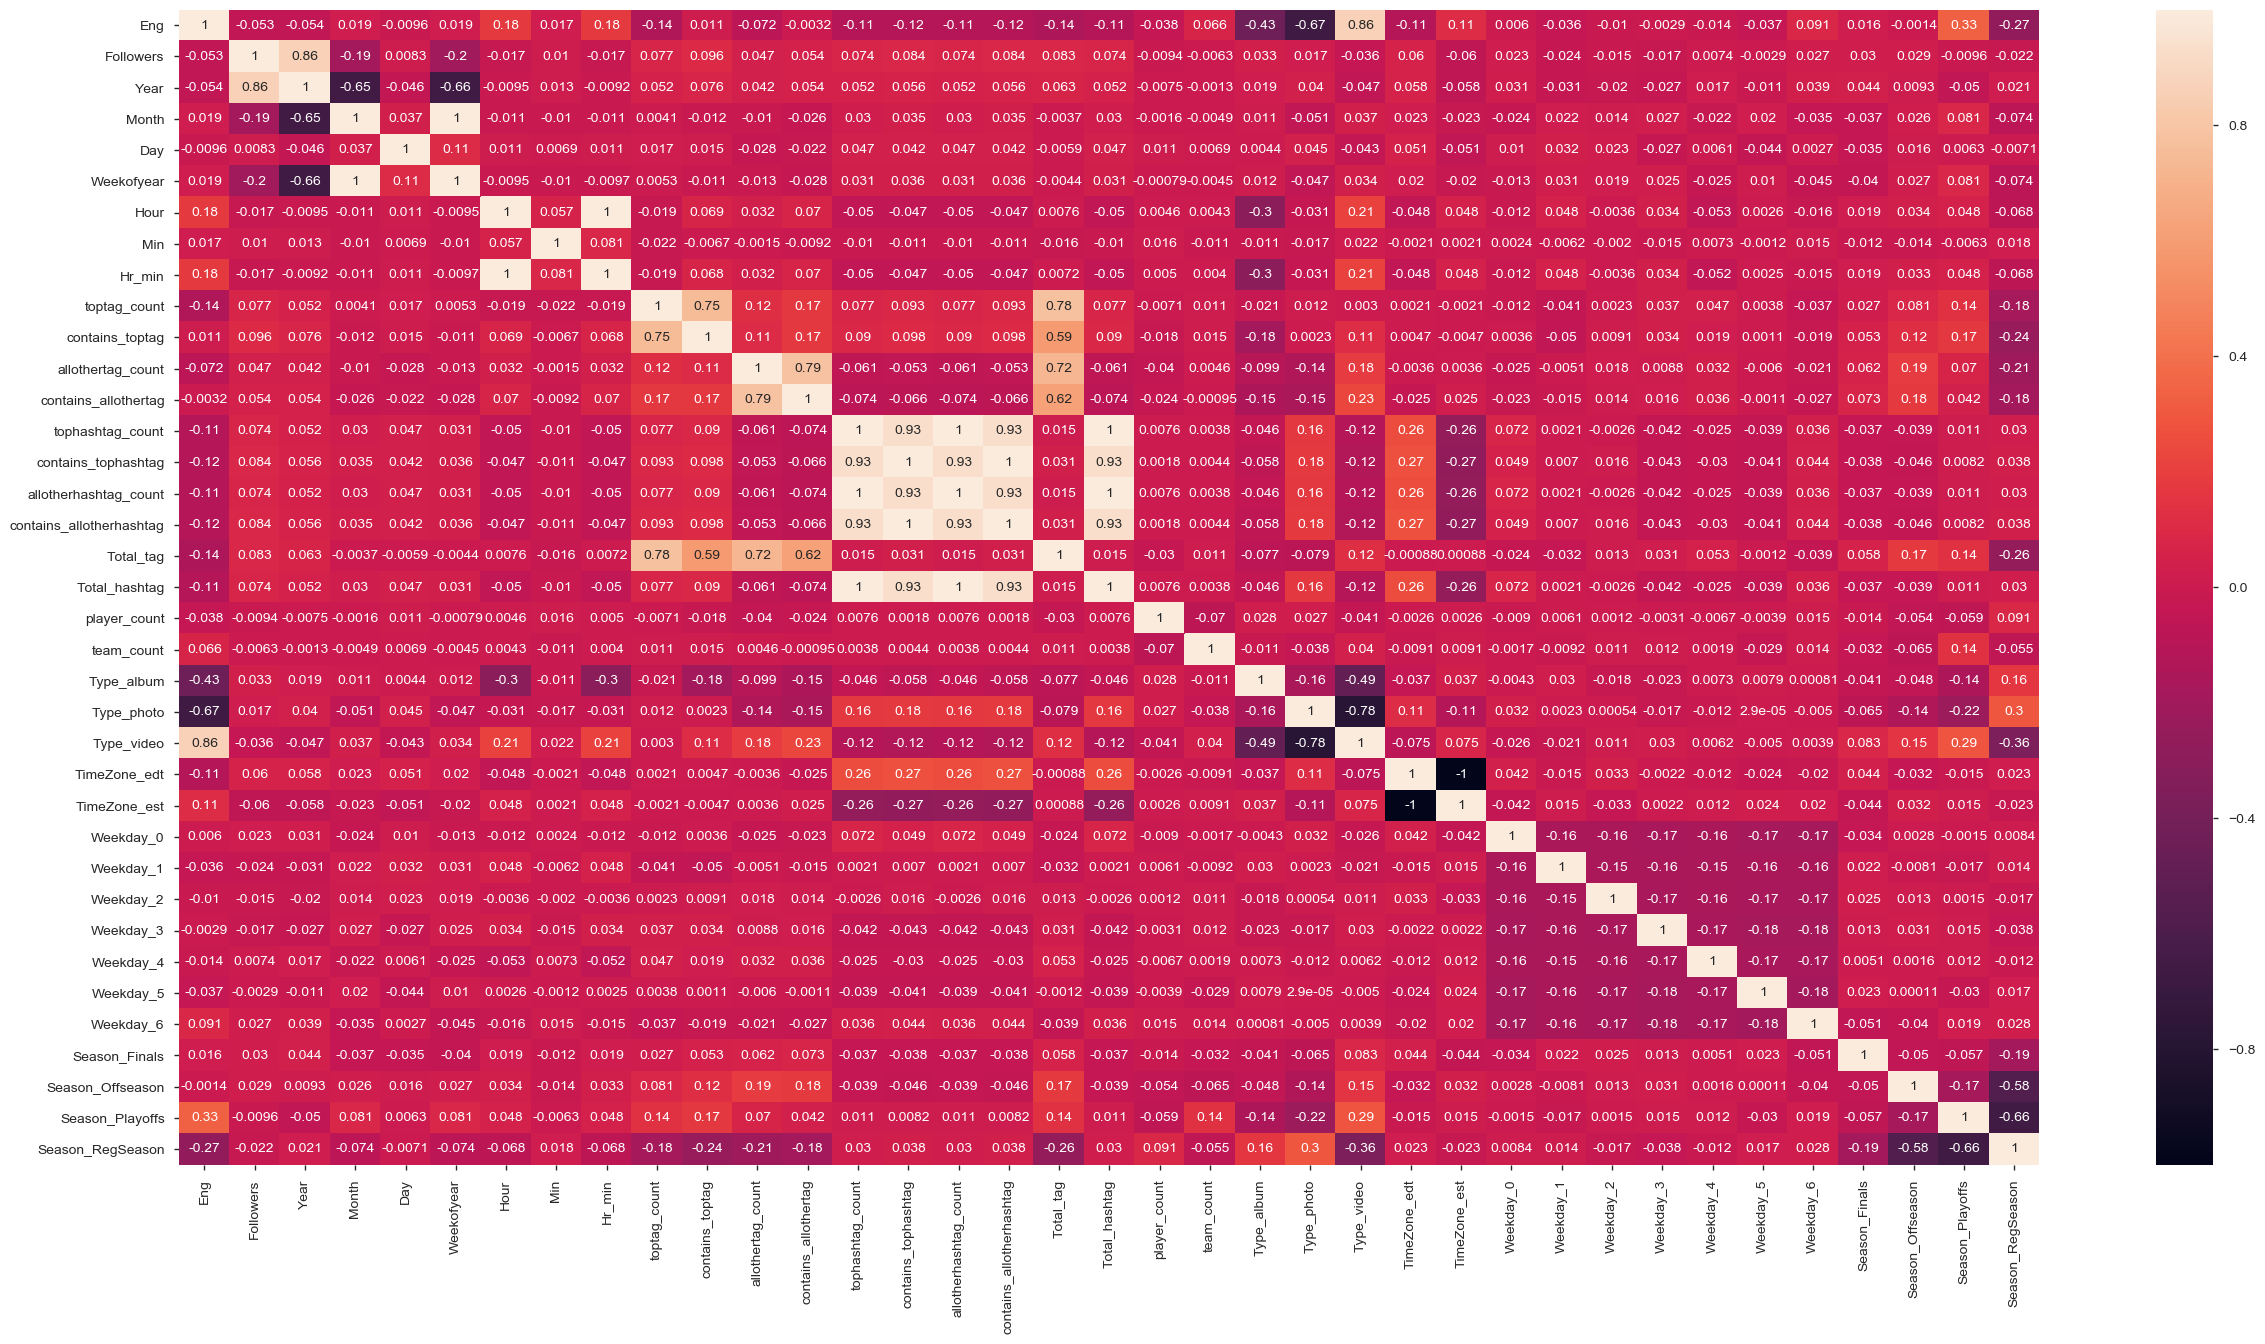

In [199]:
plt.figure(figsize=(30,15))
sns.heatmap(df_final_corr, annot=True)

In [200]:
# DROP ALL hashtag columns but 2: Total Hashtags and Contains TopHashtag
df_final.columns

Index(['Eng', 'Followers', 'Year', 'Month', 'Day', 'Weekofyear', 'Hour', 'Min',
       'Hr_min', 'toptag_count', 'contains_toptag', 'allothertag_count',
       'contains_allothertag', 'tophashtag_count', 'contains_tophashtag',
       'allotherhashtag_count', 'contains_allotherhashtag', 'Total_tag',
       'Total_hashtag', 'player_count', 'team_count', 'Type_album',
       'Type_photo', 'Type_video', 'TimeZone_edt', 'TimeZone_est', 'Weekday_0',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6', 'Season_Finals', 'Season_Offseason', 'Season_Playoffs',
       'Season_RegSeason'],
      dtype='object')

In [201]:
df_final = df_final.drop(['tophashtag_count', 'allotherhashtag_count',
       'contains_allotherhashtag'], axis = 1)

In [202]:
## lets looks at the correlation between the x variables and y(Engagements)
df_final_corr = df_final_corr['Eng']
df_corr_final_sorted = df_final_corr.sort_values().copy()
df_corr_final_sorted

Type_photo                 -0.665827
Type_album                 -0.432515
Season_RegSeason           -0.266411
Total_tag                  -0.140753
toptag_count               -0.136480
contains_allotherhashtag   -0.116787
contains_tophashtag        -0.116787
TimeZone_edt               -0.113034
allotherhashtag_count      -0.109395
tophashtag_count           -0.109395
Total_hashtag              -0.109395
allothertag_count          -0.071681
Year                       -0.053869
Followers                  -0.053031
player_count               -0.037590
Weekday_5                  -0.037415
Weekday_1                  -0.035802
Weekday_4                  -0.014206
Weekday_2                  -0.010202
Day                        -0.009580
contains_allothertag       -0.003171
Weekday_3                  -0.002851
Season_Offseason           -0.001431
Weekday_0                   0.005954
contains_toptag             0.011010
Season_Finals               0.015859
Min                         0.017335
W

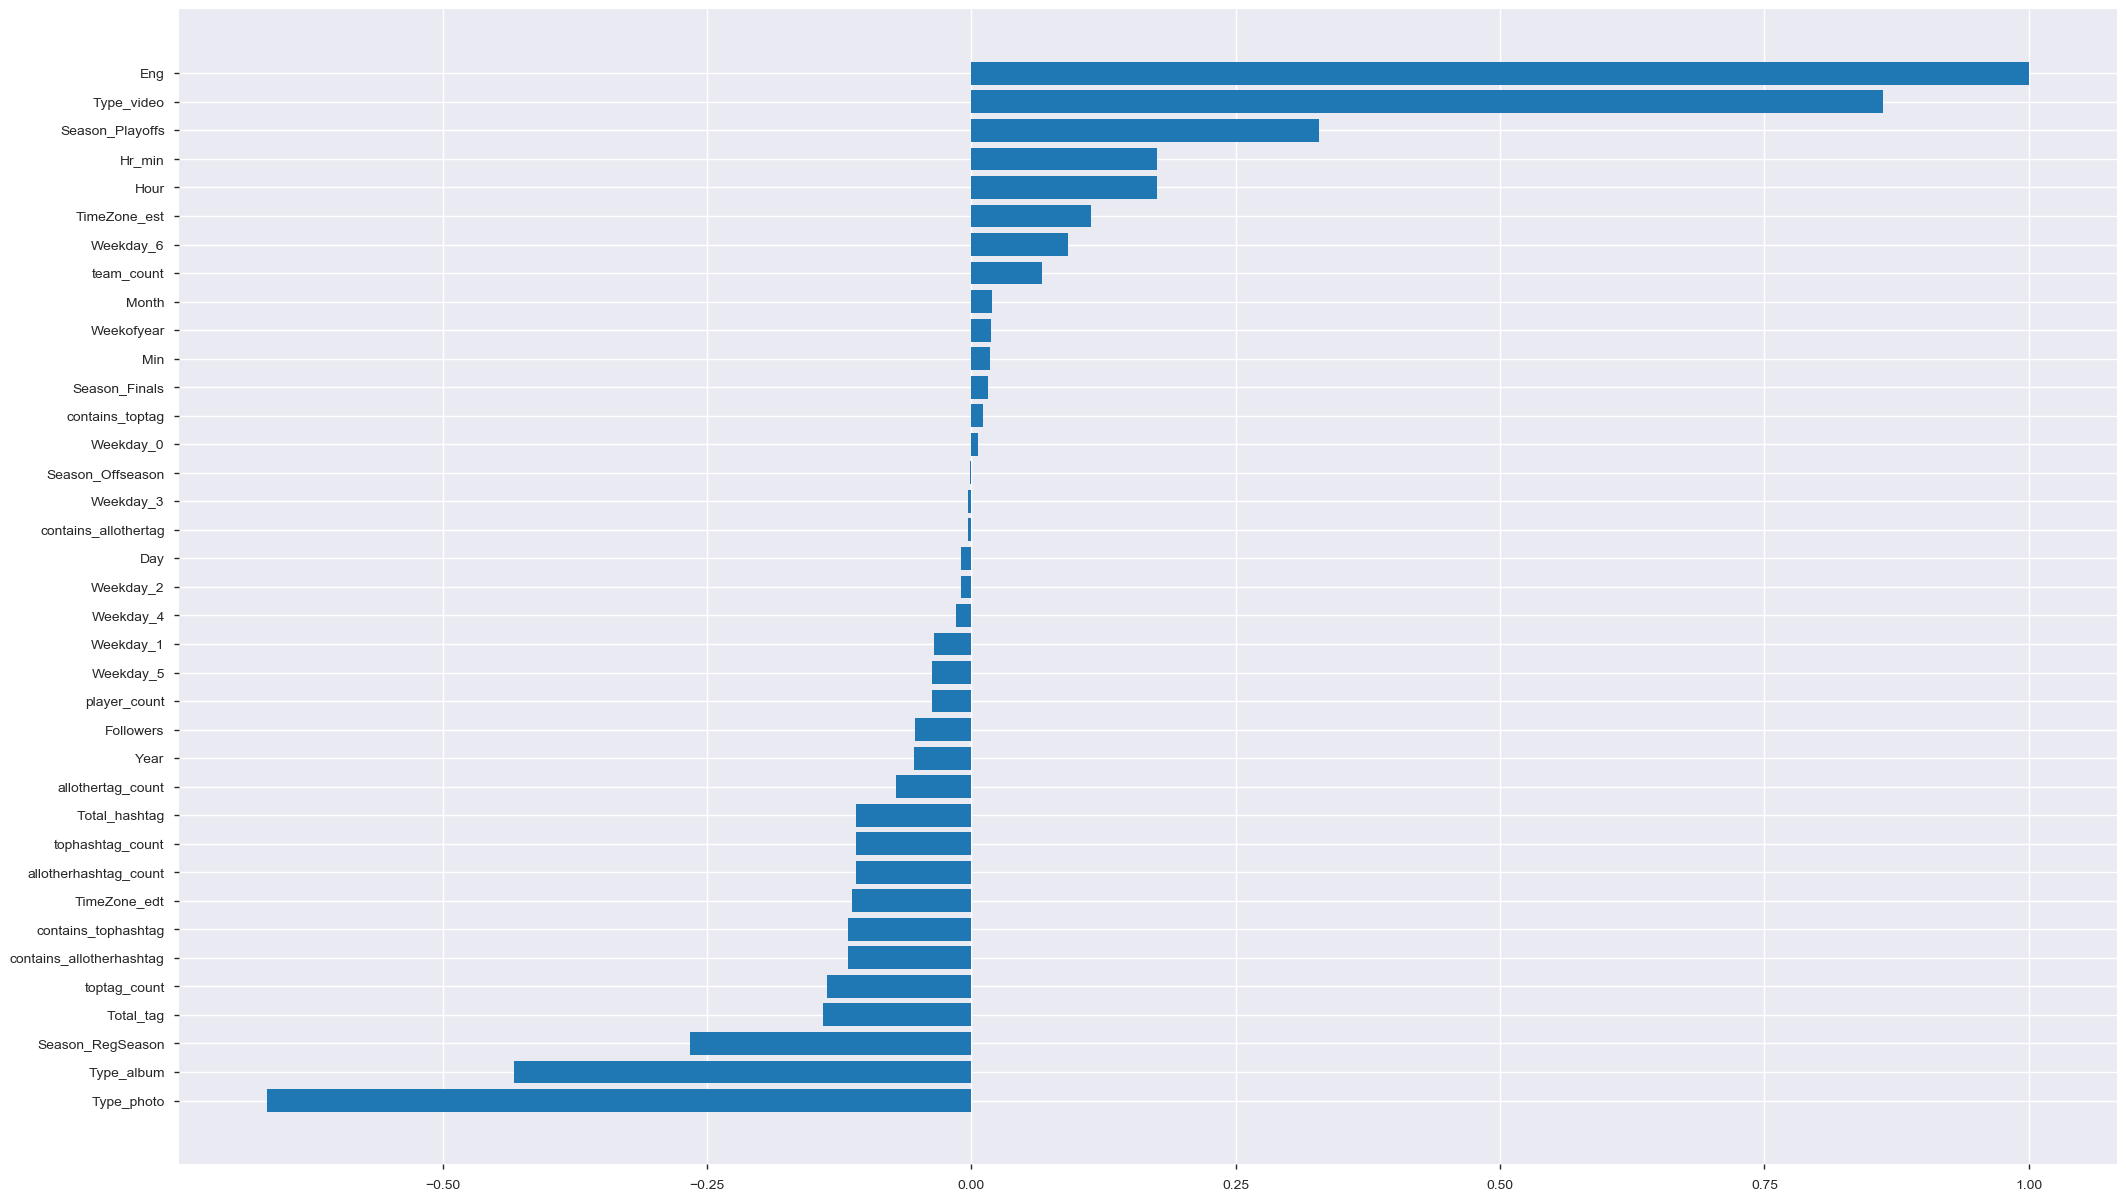

In [203]:
#Visualize correlations to have a clear & easy look at the data
plt.figure(figsize =(25,15))
plt.barh(df_corr_final_sorted.index, df_corr_final_sorted.values)
plt.show()

In [204]:
df_final.columns

Index(['Eng', 'Followers', 'Year', 'Month', 'Day', 'Weekofyear', 'Hour', 'Min',
       'Hr_min', 'toptag_count', 'contains_toptag', 'allothertag_count',
       'contains_allothertag', 'contains_tophashtag', 'Total_tag',
       'Total_hashtag', 'player_count', 'team_count', 'Type_album',
       'Type_photo', 'Type_video', 'TimeZone_edt', 'TimeZone_est', 'Weekday_0',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6', 'Season_Finals', 'Season_Offseason', 'Season_Playoffs',
       'Season_RegSeason'],
      dtype='object')

In [205]:
from scipy.stats.stats import pearsonr

In [206]:
#  lets understand if these correlations are statistically significant?
# Any varibales with a pvalue > 0.05 is statistically insignificant
# Check only for numeric columns

columns = ['Eng', 'Followers', 'Year', 'Month', 'Day',
       'Weekofyear', 'Hour', 'Min', 'Hr_min', 'toptag_count',
       'contains_toptag', 'allothertag_count', 'contains_allothertag',
       'contains_tophashtag', 'Total_tag', 'Total_hashtag', 'player_count',
       'team_count', 'Type_album', 'Type_photo', 'Type_video', 'TimeZone_edt',
       'TimeZone_est', 'Weekday_0',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6', 'Season_Finals', 'Season_Offseason', 'Season_Playoffs',
       'Season_RegSeason']

pvalue = []
corr = []

for i in columns:
    pr = pearsonr(df_final[i], df_final['Eng'])
    corr.append(round(pr[0],3))
    pvalue.append(round(pr[1],3))

pvalcorr = pd.DataFrame(
    {'corr':corr,
     'pval':pvalue,
     'x_variables':columns
    })
pvalcorr.sort_values(by ='corr')

,corr,pval,x_variables
19,-0.666,0.000,Type_photo
18,-0.433,0.000,Type_album
33,-0.266,0.000,Season_RegSeason
14,-0.141,0.000,Total_tag
9,-0.136,0.000,toptag_count
13,-0.117,0.000,contains_tophashtag
21,-0.113,0.000,TimeZone_edt
15,-0.109,0.000,Total_hashtag
11,-0.072,0.000,allothertag_count
2,-0.054,0.000,Year


In [207]:
df_final = df_final.drop(['Weekday_1', 'Weekday_2', 'Weekday_3',
       'contains_allothertag','Day','Season_Finals','contains_toptag','Min',
                          'Weekofyear','Month'], axis = 1)


In [208]:
df_final.shape

(7766, 24)

In [209]:
X = df_final.iloc[:, 1:] # all columns expect first one
y = df_final['Eng']

In [210]:
# Split into training & test sets
from sklearn.model_selection import train_test_split
# from sklearn.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA, KernelPCA

# Instantiate objects that we want in our pipeline 
scaler = StandardScaler()
lin = Ridge()

# Create a list of ('name', object)-tuples that will make up our pipeline
estimators = [('my_scaler', scaler), 
              #(('PCA'), PCA()),
              ('my_model', lin)]

# Instantiate the Pipeline itself
my_pipe = Pipeline(estimators)

In [212]:
my_params = [{
'my_scaler': [scaler],
#'PCA':[PCA()], 'PCA__n_components':np.arange(1, 30),
'my_model':[Ridge(), Lasso()],
'my_model__alpha':np.power(10.0, np.arange(-5, 5, .5))}]

grid = GridSearchCV(my_pipe, param_grid = my_params, cv = 5,
                    scoring = 'neg_mean_absolute_error', verbose =1)

In [213]:
fitted_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.9s finished


In [214]:
fitted_search.best_estimator_

Pipeline(memory=None,
     steps=[('my_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('my_model', Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [215]:
# Evaluate our best model
y_pred = fitted_search.best_estimator_.predict(X_test)

In [216]:
y_true = np.array(y_test).astype('float') 
y_train = np.array(y_train).astype('float') 

In [217]:
mean_absolute_percentage_error(np.array(y_true), np.array(y_pred))

9.828982893655981

In [218]:
# Take a look at the winning estimator. Here's how we can access the coefficients of the 
# Lasso Regression object
model_coef = fitted_search.best_estimator_.named_steps['my_model'].coef_
model_coef

array([-3.09772652e+03,  4.15053716e+03,  3.20591948e+04, -3.57522665e+04,
       -2.34739067e+04, -3.93763883e+04,  2.27265798e+03,  2.98875390e+03,
       -4.69279620e+03, -2.35237745e+03,  2.95080357e+03, -9.41652531e+04,
       -1.27449405e+05,  1.26314631e+04, -7.75657676e+03,  2.13254366e-12,
        7.45966934e+03,  1.75859350e+03, -1.29989804e+03,  1.45241971e+04,
        4.65294850e+03,  3.27849328e+04,  2.29878393e+04])

In [219]:
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'coefficient': fitted_search.best_estimator_.named_steps['my_model'].coef_
                             })

results_frame_sorted = results_frame.sort_values(by='coefficient',  ascending=False)
results_frame_sorted

,feature,coefficient
21,Season_Playoffs,3.278493e+04
2,Hour,3.205919e+04
22,Season_RegSeason,2.298784e+04
19,Weekday_6,1.452420e+04
13,Type_video,1.263146e+04
16,Weekday_0,7.459669e+03
20,Season_Offseason,4.652949e+03
1,Year,4.150537e+03
7,Total_tag,2.988754e+03
10,team_count,2.950804e+03


# Hold_out_data Results

In [220]:
df_hold = df2

In [221]:
df_hold['Eng'] = df_hold['Eng'].astype('float') 
df_hold['Followers'] = df_hold['Followers'].astype('float')
df_hold['Year'] = df_hold['Year'].astype('float')
df_hold['Month'] = df_hold['Month'].astype('float')
df_hold['Day'] = df_hold['Day'].astype('float')
df_hold['Weekofyear'] = df_hold['Weekofyear'].astype('float')
df_hold['Hour'] = df_hold['Hour'].astype('float')
df_hold['Min'] = df_hold['Min'].astype('float')
df_hold['Hr_min'] = df_hold['Hr_min'].astype('float')

In [222]:
#drop columns we dont need
df_hold= df_hold.drop(['Created','Description','Date','Time'], axis = 1)

In [223]:
df_hold = pd.get_dummies(data=df_hold, columns=['Type', 'TimeZone','Weekday','Season'])

In [224]:
df_hold.columns

Index(['Eng', 'Followers', 'Year', 'Month', 'Day', 'Weekofyear', 'Hour', 'Min',
       'Hr_min', 'toptag_count', 'contains_toptag', 'allothertag_count',
       'contains_allothertag', 'tophashtag_count', 'contains_tophashtag',
       'allotherhashtag_count', 'contains_allotherhashtag', 'Total_tag',
       'Total_hashtag', 'player_count', 'team_count', 'Type_album',
       'Type_photo', 'Type_video', 'TimeZone_edt', 'TimeZone_est', 'Weekday_0',
       'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Weekday_6', 'Season_Finals', 'Season_Offseason', 'Season_Playoffs',
       'Season_RegSeason'],
      dtype='object')

In [225]:
#drop all columns that were dropped from the training_set
df_hold = df_hold.drop(['tophashtag_count', 'allotherhashtag_count',
       'contains_allotherhashtag','Weekday_1', 'Weekday_2', 'Weekday_3',
       'contains_allothertag','Day','Season_Finals','contains_toptag','Min',
                          'Weekofyear','Month' ], axis = 1)


In [226]:
#check
print(df_final.shape)
print(df_hold.shape)

(7766, 24)
(1000, 24)


In [227]:
#split the data to know a
X_hold = df_hold.iloc[:, 1:] # all columns expect first one
y_hold = df_hold['Eng'] 

In [228]:
# Predict results
y_pred_hold = fitted_search.best_estimator_.predict(X_hold)

In [229]:
y_pred_hold

array([421786.57198231, 393869.05718609, 650474.55209653, 677838.18368266,
       676760.35997126, 379500.56698482, 776119.98878432, 705699.1911459 ,
       753045.07538161, 597074.00674543, 749072.02455777, 710532.9283378 ,
       407959.80884642, 756268.10565599, 629004.20011511, 427160.58105142,
       770545.95888105, 420011.42366026, 754903.82639514, 437372.0894465 ,
       791689.98888948, 751158.34218197, 683622.13022157, 379173.95465562,
       699281.22221823, 771096.01700388, 689031.13308817, 694896.15315021,
       677314.51366491, 716596.75672404, 305112.0102035 , 389701.10383722,
       377155.9267615 , 738469.04621785, 744749.59808408, 390206.54097169,
       651685.35542432, 401272.50033174, 741357.15643749, 414186.99632682,
       329893.72718534, 759660.5945521 , 383624.60693431, 719068.20347948,
       395307.19362209, 653691.95642469, 680150.5169162 , 645841.33881618,
       760289.11277627, 411648.57861057, 762084.03255168, 756002.51196472,
       372520.3932743 , 4

In [230]:
df_hold_pred = df2

In [231]:
df_hold_pred = df_hold_pred.iloc[:,:-24] # all columns expect first one
df_hold_pred

,Eng,Followers,Created,Type,Description
7766,0.0,36984682.0,2019-05-22 00:31:55 edt,photo,the @raptors even up the eastern conference fi...
7767,0.0,36984682.0,2019-05-21 23:20:41 edt,photo,the @raptors even the eastern conference final...
7768,0.0,36984682.0,2019-05-21 21:18:51 edt,video,@sergeibaka keeps it alive for the @raptors! (...
7769,0.0,36955156.0,2019-05-21 18:20:09 edt,video,???? the superhuman hands of giannis & kawhi ?...
7770,0.0,36955156.0,2019-05-21 15:04:31 edt,video,?? the @raptors & @bucks in transition! #nbabr...
7771,0.0,36955156.0,2019-05-21 02:09:47 edt,photo,the @warriors advance to the 2019 #nbafinals p...
7772,0.0,36955156.0,2019-05-21 01:30:13 edt,video,big bro wins this one! #phantomcam
7773,0.0,36955156.0,2019-05-20 22:25:20 edt,video,@stephencurry30 pulls up from deep to end the ...
7774,0.0,36955156.0,2019-05-20 22:09:36 edt,video,the @warriors move the ball to find andrew bog...
7775,0.0,36928789.0,2019-05-20 15:26:07 edt,video,?? @money23green micã­d up in game 3 of the wc...


In [232]:
df_hold_pred['Eng'] = y_pred_hold.astype(int)

# Holdout Data With Predictions

In [233]:
df_hold_pred

,Eng,Followers,Created,Type,Description
7766,421786,36984682.0,2019-05-22 00:31:55 edt,photo,the @raptors even up the eastern conference fi...
7767,393869,36984682.0,2019-05-21 23:20:41 edt,photo,the @raptors even the eastern conference final...
7768,650474,36984682.0,2019-05-21 21:18:51 edt,video,@sergeibaka keeps it alive for the @raptors! (...
7769,677838,36955156.0,2019-05-21 18:20:09 edt,video,???? the superhuman hands of giannis & kawhi ?...
7770,676760,36955156.0,2019-05-21 15:04:31 edt,video,?? the @raptors & @bucks in transition! #nbabr...
7771,379500,36955156.0,2019-05-21 02:09:47 edt,photo,the @warriors advance to the 2019 #nbafinals p...
7772,776119,36955156.0,2019-05-21 01:30:13 edt,video,big bro wins this one! #phantomcam
7773,705699,36955156.0,2019-05-20 22:25:20 edt,video,@stephencurry30 pulls up from deep to end the ...
7774,753045,36955156.0,2019-05-20 22:09:36 edt,video,the @warriors move the ball to find andrew bog...
7775,597074,36928789.0,2019-05-20 15:26:07 edt,video,?? @money23green micã­d up in game 3 of the wc...
